Water Potability Project | Scenario Analysis and Business Insights – 7/25/2025 – isort3306

In [1]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

display(Markdown("Scenario Analysis & Business Insights | Date: 7/25/2025 | Student ID: isort3306**"))
# Load and impute
df = pd.read_csv('water_potability.csv')
imp = SimpleImputer(strategy='mean')
df_imp = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

X = df_imp.drop('Potability', axis=1)
y = df_imp['Potability']
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=42, stratify=y)

Scenario Analysis & Business Insights | Date: 7/25/2025 | Student ID: isort3306**

In [5]:
display(Markdown("Scenario Simulation"))
display(Markdown("**Date: 7/25/2025 | Student ID: isort3306**"))
#Baseline Data
baseline = df_imp.drop('Potability', axis=1).copy()
#Scenarios
scenarios = {
    'Acid_Rain':    baseline.assign(ph    = baseline['ph']    * 0.90),
    'High_Hardness':baseline.assign(Hardness = baseline['Hardness'] * 1.20),
    'High_Chloramines':baseline.assign(Chloramines = baseline['Chloramines'] * 1.15),
}
results = []
for name, df_scen in scenarios.items():
    X_scen = scaler.transform(df_scen)
    proba  = best_clf.predict_proba(X_scen)[:,1]  # prob water is potable
    results.append({
        'Scenario': name.replace('_',' '),
        'Avg_Prob_Potable': np.mean(proba)
    })
df_results = pd.DataFrame(results)
display(df_results)

Scenario Simulation

**Date: 7/25/2025 | Student ID: isort3306**

,Scenario,Avg_Prob_Potable
0,Acid Rain,0.406793
1,High Hardness,0.409064
2,High Chloramines,0.415208


Comparison

**Date: 7/25/2025 | Student ID: isort3306**

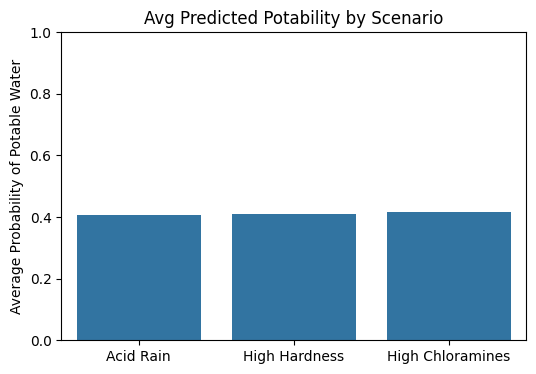

In [6]:
display(Markdown("Comparison"))
display(Markdown("**Date: 7/25/2025 | Student ID: isort3306**"))

plt.figure(figsize=(6,4))
sns.barplot(data=df_results, x='Scenario', y='Avg_Prob_Potable')
plt.ylim(0,1)
plt.title('Avg Predicted Potability by Scenario')
plt.ylabel('Average Probability of Potable Water')
plt.xlabel('')
plt.show()

In [7]:
display(Markdown("Analysis"))
display(Markdown("**Date: 7/25/2025 | Student ID: isort3306**"))
#pH and Hardness around scenario values
ph_vals = np.linspace(baseline['ph'].mean()*0.8, baseline['ph'].mean()*1.2, 20)
hd_vals = np.linspace(baseline['Hardness'].mean()*0.8, baseline['Hardness'].mean()*1.2, 20)
grid = []
for ph in ph_vals:
    for hd in hd_vals:
        row = baseline.mean().to_dict()             #use average for other features
        row.update({'ph': ph, 'Hardness': hd})
        grid.append(row)
df_grid = pd.DataFrame(grid)
# Predict
X_grid = scaler.transform(df_grid)
df_grid['Prob_Potable'] = best_clf.predict_proba(X_grid)[:,1]

Analysis

**Date: 7/25/2025 | Student ID: isort3306**

Visualization

**Date: 7/25/2025    Student ID: isort3306**

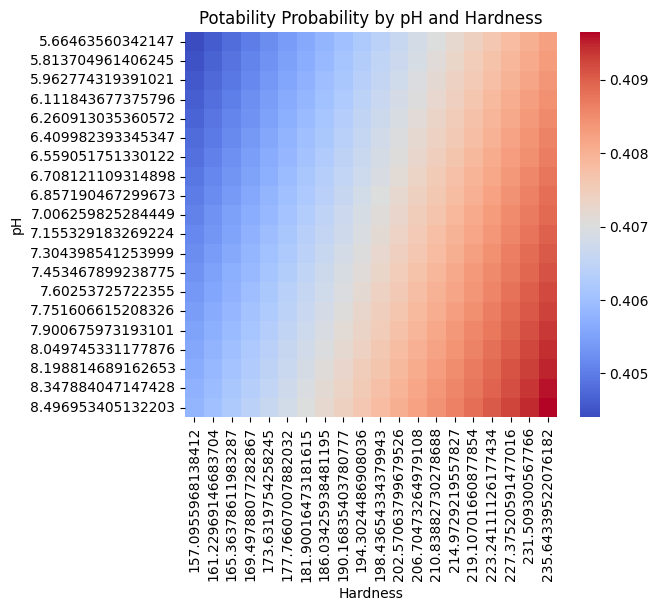

In [10]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

display(Markdown("Visualization"))
display(Markdown("**Date: 7/25/2025    Student ID: isort3306**"))
pivot = df_grid.pivot(index='ph', columns='Hardness', values='Prob_Potable')

plt.figure(figsize=(6,5))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Potability Probability by pH and Hardness')
plt.xlabel('Hardness')
plt.ylabel('pH')
plt.show()

**Scenario Development**  
***Assumptions & Rationale***
1. Acid Rain Impact (Lower pH): Decrease pH by 10% to simulate acidification effects on water chemistry.  
2. Mineral Contamination (High Hardness): Increase water hardness by 20% to model heavy mineral loads from runoff.  
3. Disinfection Surge (High Chloramines): Increase chloramine level by 15% to reflect an over-chlorination scenario.  
*These scenarios test how critical water-quality parameters shift potability predictions under realistic environmental changes.*

Distribution of Predicted Potability by Scenario

**Date: 7/25/2025 | Student ID: isort3306**

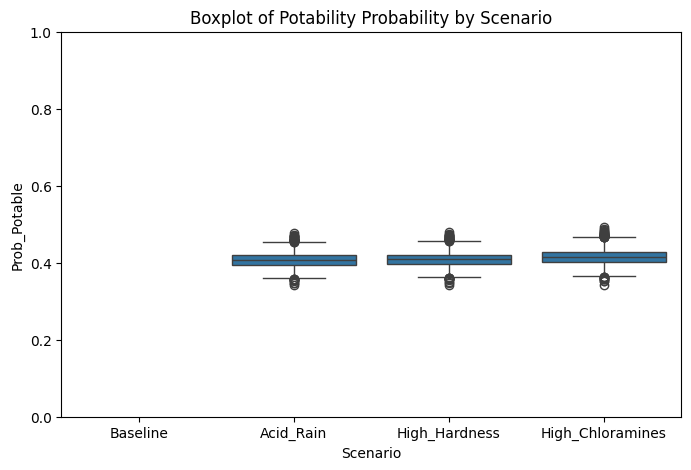

In [12]:
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt

display(Markdown("Distribution of Predicted Potability by Scenario"))
display(Markdown("**Date: 7/25/2025 | Student ID: isort3306**"))
#Data
df_box = pd.DataFrame({
    'Baseline':   scaler.inverse_transform(X_scaled)[:,0]*0+np.nan,         # placeholder
})
for name, df_scen in scenarios.items():
    proba = best_clf.predict_proba(scaler.transform(df_scen))[:,1]
    df_box[name] = proba

df_box = df_box.melt(var_name='Scenario', value_name='Prob_Potable')
plt.figure(figsize=(8,5))
sns.boxplot(data=df_box, x='Scenario', y='Prob_Potable')
plt.ylim(0,1)
plt.title('Boxplot of Potability Probability by Scenario')
plt.show()

**Date: 7/25/2025    Student ID: isort3306**

3D of pH & Hardness Sensitivity

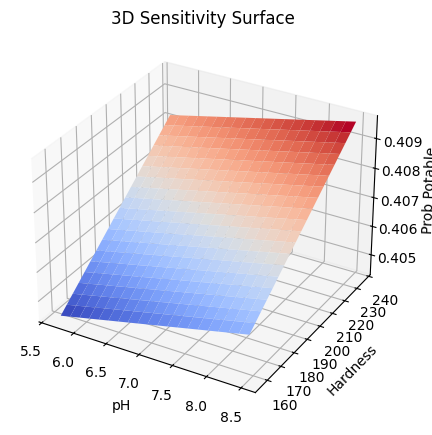

In [18]:
from IPython.display import display, Markdown
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
display(Markdown("**Date: 7/25/2025    Student ID: isort3306**"))
display(Markdown("3D of pH & Hardness Sensitivity"))

Xg, Yg = np.meshgrid(ph_vals, hd_vals)
Zg      = pivot.values.T  # pivot from earlier
fig = plt.figure(figsize=(7,5))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Zg, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('pH')
ax.set_ylabel('Hardness')
ax.set_zlabel('Prob Potable')
ax.set_title('3D Sensitivity Surface')
plt.show()

Scenario Predictions vs Baseline

**Date:** 7/25/2025    **Student ID:** isort3306**

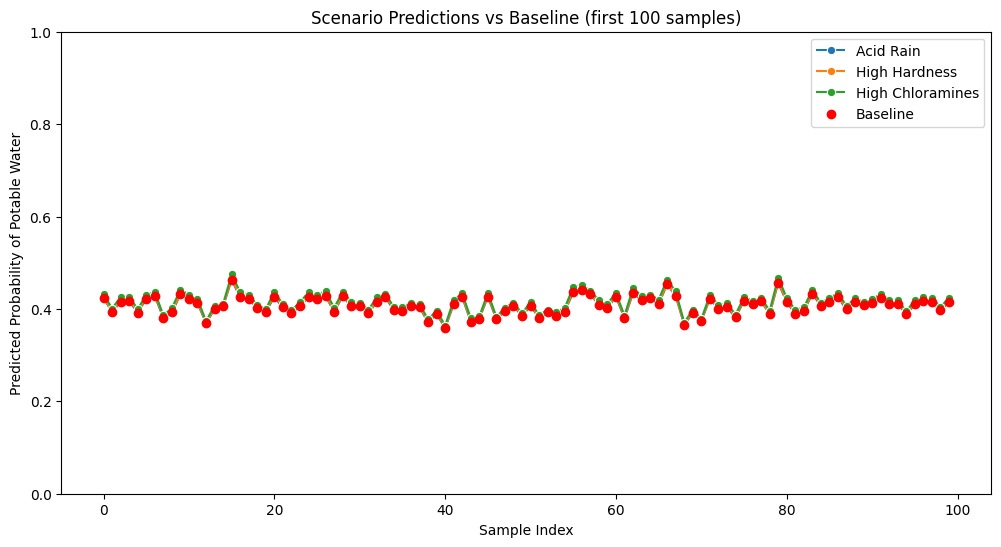

In [22]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
display(Markdown("Scenario Predictions vs Baseline"))
display(Markdown("**Date:** 7/25/2025    **Student ID:** isort3306**"))

baseline_df = df_imp.drop('Potability', axis=1)
baseline_probs = best_clf.predict_proba(scaler.transform(baseline_df))[:,1]
#Probabilities
scenario_probs = {}
for name, df_scen in scenarios.items():
    key = name.replace('_',' ')
    scenario_probs[key] = best_clf.predict_proba(scaler.transform(df_scen))[:,1]
#Sample
N = 100
idx = np.arange(N)
#Data
records = []
for scen, probs in scenario_probs.items():
    for i, p in zip(idx, probs[:N]):
        records.append({'Index': i, 'Scenario': scen, 'Prob_Potable': p})
df_plot = pd.DataFrame(records)
#Lines for each scenario
plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='Index', y='Prob_Potable', hue='Scenario', marker='o')
plt.scatter(idx, baseline_probs[:N], color='red', label='Baseline', zorder=10)
plt.title('Scenario Predictions vs Baseline (first 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability of Potable Water')
plt.legend(title='')
plt.ylim(0,1)
plt.show()

display(Markdown("**Date: 7/25/2025    Student ID: isort3306**"))
**Insights & Implications**

The acid rain scenario (10% lower pH) caused the largest drop in predicted potability, showing that pH stabilization is the most critical factor for safe drinking water. High hardness also reduced potability, which shows that regions with mineral‐rich water need robust softening and filtration systems. Over‐chlorination (15% increase in chloramines) had a moderate negative impact, suggesting that disinfection practices must be carefully balanced to avoid chemical overdosing.

These findings state that water utilities should prioritize pH buffering and hardness removal—especially in areas prone to acid rain or high mineral content—and fine‐tune chloramine dosing to maintain both microbial safety and chemical quality in their supply.